In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from scipy import stats

sns.set_style("whitegrid")
sns.set(rc={'figure.autolayout': True})
sns.set_context("notebook", font_scale=1.75)
sns.set_palette("colorblind")

In [114]:
file_path = '../data/evaluation/nasa_tlx/rag-survey.csv'
df = pd.read_csv(file_path)
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q46_7,Q46_8,Q46_9,Q46_10,Q46_11,Q46_12,Q46_13,Q46_14,Q46_15,GROUP
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Please choose which item was more important to...,Please choose which item was more important to...,Please choose which item was more important to...,Please choose which item was more important to...,Please choose which item was more important to...,Please choose which item was more important to...,Please choose which item was more important to...,Please choose which item was more important to...,Please choose which item was more important to...,GROUP
1,"{""ImportId"":""startDate"",""timeZone"":""Europe/War...","{""ImportId"":""endDate"",""timeZone"":""Europe/Warsaw""}","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""Europe/...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID46_7""}","{""ImportId"":""QID46_8""}","{""ImportId"":""QID46_9""}","{""ImportId"":""QID46_10""}","{""ImportId"":""QID46_11""}","{""ImportId"":""QID46_12""}","{""ImportId"":""QID46_13""}","{""ImportId"":""QID46_14""}","{""ImportId"":""QID46_15""}","{""ImportId"":""GROUP""}"
2,2023-12-06 21:36:43,2023-12-06 22:01:57,IP Address,89.64.7.66,100,1514,True,2023-12-06 22:01:58,R_2a8LU9MdwtC3oaL,NaN,...,2,2,2,1,2,2,1,1,2,rag-test-9952
3,2023-12-08 08:59:43,2023-12-08 09:27:39,IP Address,212.51.207.170,100,1676,True,2023-12-08 09:27:40,R_1Ii8PYND4bGYO4w,NaN,...,1,2,1,2,2,2,1,1,1,rag-test-7555
4,2023-12-08 08:59:46,2023-12-08 09:34:29,IP Address,212.51.207.170,100,2083,True,2023-12-08 09:34:30,R_21tTKvpWu9M58Ea,NaN,...,2,2,1,2,1,2,1,1,1,rag-test-8369
5,2023-12-06 23:36:28,2023-12-08 17:42:06,IP Address,5.173.112.116,100,151537,True,2023-12-08 17:42:07,R_3e9mHt8PdMuBfeI,NaN,...,2,2,2,1,1,1,1,1,2,rag-test-8369
6,2023-12-09 13:51:32,2023-12-09 14:00:49,IP Address,77.237.29.221,100,556,True,2023-12-09 14:00:50,R_DI7YvpkeLaHakX7,NaN,...,2,1,1,1,1,2,2,1,1,rag-test-8369
7,2023-12-09 13:42:21,2023-12-09 14:01:29,IP Address,37.225.84.90,100,1148,True,2023-12-09 14:01:30,R_1FLplvVQH9SnGCw,NaN,...,2,1,1,2,2,1,2,2,2,rag-test-9952
8,2023-12-10 14:33:57,2023-12-10 15:00:19,IP Address,31.183.100.151,100,1582,True,2023-12-10 15:00:20,R_3emERB8PpFSyWCn,NaN,...,1,2,1,2,2,2,2,2,1,rag-test-9952
9,2023-12-11 09:28:05,2023-12-11 10:52:19,IP Address,79.184.252.219,100,5053,True,2023-12-11 10:52:20,R_3oByTPpdhOID1KZ,NaN,...,1,2,1,2,2,2,1,1,1,rag-test-9632


In [115]:
cleaned_df = df.drop(index=[0, 1], columns=['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
                                            'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
                                            'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
                                            'ExternalReference', 'LocationLatitude', 'LocationLongitude',
                                            'DistributionChannel', 'UserLanguage'])

In [116]:
cleaned_df

,Q33,Q31,Q32,Q32.1,Q33.1,Q23,Q2,Q3,Q4,Q17,...,Q46_7,Q46_8,Q46_9,Q46_10,Q46_11,Q46_12,Q46_13,Q46_14,Q46_15,GROUP
2,25-34,Male,Engineer's degree,Yes,Daily,"using the ""when"" statement in a conditional ""...",NaN,NaN,NaN,NaN,...,2,2,2,1,2,2,1,1,2,rag-test-9952
3,18-24,Male,High school degree or equivalent,Yes,Daily,NaN,NaN,Answering is not possible given the available ...,NaN,NaN,...,1,2,1,2,2,2,1,1,1,rag-test-7555
4,18-24,Male,High school degree or equivalent,Yes,Daily,NaN,NaN,NaN,NaN,NaN,...,2,2,1,2,1,2,1,1,1,rag-test-8369
5,18-24,Female,Bachelor's degree,Yes,Once a month,NaN,NaN,NaN,An SCTP endpoint should use the ASSOCIATE pri...,NaN,...,2,2,2,1,1,1,1,1,2,rag-test-8369
6,18-24,Female,Engineer's degree,Yes,Few times per week,NaN,NaN,"In the iSCSI protocol, command numbering is m...",NaN,NaN,...,2,1,1,1,1,2,2,1,1,rag-test-8369
7,25-34,Male,Engineer's degree,Yes,Few times per year,NaN,NaN,session-wide,Use the ASSOCIATE primitive,NaN,...,2,1,1,2,2,1,2,2,2,rag-test-9952
8,18-24,Male,Bachelor's degree,Yes,Daily,YANG allows the use of conditional augmentatio...,The OAuth authorization framework [RFC6749] de...,NaN,NaN,NaN,...,1,2,1,2,2,2,2,2,1,rag-test-9952
9,25-34,Male,Master's degree,Yes,Few times per week,NaN,NaN,NaN,Answer: An SCTP endpoint should use the ASSOCI...,NaN,...,1,2,1,2,2,2,1,1,1,rag-test-9632
10,25-34,Male,Master's degree,No,Daily,Can we add new mandatory leafs to the configur...,OAuth facilitates federated authentication in ...,NaN,NaN,NaN,...,2,2,2,1,1,2,1,1,2,rag-test-9952
11,25-34,Male,Engineer's degree,Yes,Few times per month,NaN,NaN,"n the iSCSI protocol, command numbering is man...",According to the SCTP protocol documents [RFC9...,NaN,...,1,2,2,2,2,1,1,1,2,rag-test-9632


In [117]:
new_column_types = {
    'Age': str,
    'Gender': str,
    'Educational level': str,
    'Previously used AI chat': str,
    'Working with technical documentation': str,

    'Q0 RAG': str,
    'Q1 RAG': str,
    'Q2 RAG': str,
    'Q3 RAG': str,
    'Q4 RAG': str,
    'Q5 RAG': str,
    'Q6 RAG': str,
    'Q7 RAG': str,
    'Q8 RAG': str,
    'Q9 RAG': str,

    'Base mental demand RAG': int,
    'Base physical demand RAG': int,
    'Base temporal demand RAG': int,
    'Base performance RAG': int,
    'Base effort RAG': int,
    'Base frustration RAG': int,

    'Effort or Performance RAG': int,
    'Temporal demand or Frustration RAG': int,
    'Temporal demand or Effort RAG': int,
    'Physical demand or Frustration RAG': int,
    'Performance or Frustration RAG': int,
    'Physical demand or Temporal demand RAG': int,
    'Physical demand or Performance RAG': int,
    'Temporal demand or Mental demand RAG': int,
    'Frustration or Effort RAG': int,
    'Performance or Mental demand RAG': int,
    'Performance or Temporal demand RAG': int,
    'Mental demand or Effort RAG': int,
    'Mental demand or Physical demand RAG': int,
    'Effort or Physical demand RAG': int,
    'Frustration or Mental demand RAG': int,
    # -------------------------------------------
    'Q0 NONRAG': str,
    'Q1 NONRAG': str,
    'Q2 NONRAG': str,
    'Q3 NONRAG': str,
    'Q4 NONRAG': str,
    'Q5 NONRAG': str,
    'Q6 NONRAG': str,
    'Q7 NONRAG': str,
    'Q8 NONRAG': str,
    'Q9 NONRAG': str,

    'Base mental demand NONRAG': int,
    'Base physical demand NONRAG': int,
    'Base temporal demand NONRAG': int,
    'Base performance NONRAG': int,
    'Base effort NONRAG': int,
    'Base frustration NONRAG': int,

    'Effort or Performance NONRAG': int,
    'Temporal demand or Frustration NONRAG': int,
    'Temporal demand or Effort NONRAG': int,
    'Physical demand or Frustration NONRAG': int,
    'Performance or Frustration NONRAG': int,
    'Physical demand or Temporal demand NONRAG': int,
    'Physical demand or Performance NONRAG': int,
    'Temporal demand or Mental demand NONRAG': int,
    'Frustration or Effort NONRAG': int,
    'Performance or Mental demand NONRAG': int,
    'Performance or Temporal demand NONRAG': int,
    'Mental demand or Effort NONRAG': int,
    'Mental demand or Physical demand NONRAG': int,
    'Effort or Physical demand NONRAG': int,
    'Frustration or Mental demand NONRAG': int,

    'Configuration': str,
}

cleaned_df = cleaned_df.rename(columns=dict(zip(cleaned_df.columns.tolist(), new_column_types.keys()))).astype(
    new_column_types)

In [118]:
points_for_rag_answers = [
    20,
    10,
    20,
    20,
    20,
    20,
    20,
    20,
    10,
    20,
    20,
    0,
    20,
    20,
    10,
    10,
    20,
    20,
    10,
    20,
    20,
    10,
]

points_for_nonrag_answers = [
    20,
    0,
    0,
    0,
    0,
    10,
    10,
    20,
    10,
    20,
    10,
    0,
    0,
    10,
    20,
    10,
    0,
    0,
    0,
    20,
    20,
    10
]

cleaned_df['Base actual performance NONRAG'] = points_for_nonrag_answers
cleaned_df['Base actual performance RAG'] = points_for_rag_answers
cleaned_df = cleaned_df.astype({'Base actual performance NONRAG': int,
                                'Base actual performance RAG': int})

In [119]:
nonrag_cleaned_df = cleaned_df.drop(columns=['Q0 RAG',
                                             'Q1 RAG',
                                             'Q2 RAG',
                                             'Q3 RAG',
                                             'Q4 RAG',
                                             'Q5 RAG',
                                             'Q6 RAG',
                                             'Q7 RAG',
                                             'Q8 RAG',
                                             'Q9 RAG',

                                             'Q0 NONRAG',
                                             'Q1 NONRAG',
                                             'Q2 NONRAG',
                                             'Q3 NONRAG',
                                             'Q4 NONRAG',
                                             'Q5 NONRAG',
                                             'Q6 NONRAG',
                                             'Q7 NONRAG',
                                             'Q8 NONRAG',
                                             'Q9 NONRAG',

                                             'Base actual performance RAG',
                                             'Base mental demand RAG',
                                             'Base physical demand RAG',
                                             'Base temporal demand RAG',
                                             'Base performance RAG',
                                             'Base effort RAG',
                                             'Base frustration RAG',

                                             'Effort or Performance RAG',
                                             'Temporal demand or Frustration RAG',
                                             'Temporal demand or Effort RAG',
                                             'Physical demand or Frustration RAG',
                                             'Performance or Frustration RAG',
                                             'Physical demand or Temporal demand RAG',
                                             'Physical demand or Performance RAG',
                                             'Temporal demand or Mental demand RAG',
                                             'Frustration or Effort RAG',
                                             'Performance or Mental demand RAG',
                                             'Performance or Temporal demand RAG',
                                             'Mental demand or Effort RAG',
                                             'Mental demand or Physical demand RAG',
                                             'Effort or Physical demand RAG',
                                             'Frustration or Mental demand RAG', ])

nonrag_rename_dict = {
    'Base actual performance NONRAG': 'Base actual performance',
    'Base mental demand NONRAG': 'Base mental demand',
    'Base physical demand NONRAG': 'Base physical demand',
    'Base temporal demand NONRAG': 'Base temporal demand',
    'Base performance NONRAG': 'Base performance',
    'Base effort NONRAG': 'Base effort',
    'Base frustration NONRAG': 'Base frustration',
    'Effort or Performance NONRAG': 'Effort or Performance',
    'Temporal demand or Frustration NONRAG': 'Temporal demand or Frustration',
    'Temporal demand or Effort NONRAG': 'Temporal demand or Effort',
    'Physical demand or Frustration NONRAG': 'Physical demand or Frustration',
    'Performance or Frustration NONRAG': 'Performance or Frustration',
    'Physical demand or Temporal demand NONRAG': 'Physical demand or Temporal demand',
    'Physical demand or Performance NONRAG': 'Physical demand or Performance',
    'Temporal demand or Mental demand NONRAG': 'Temporal demand or Mental demand',
    'Frustration or Effort NONRAG': 'Frustration or Effort',
    'Performance or Mental demand NONRAG': 'Performance or Mental demand',
    'Performance or Temporal demand NONRAG': 'Performance or Temporal demand',
    'Mental demand or Effort NONRAG': 'Mental demand or Effort',
    'Mental demand or Physical demand NONRAG': 'Mental demand or Physical demand',
    'Effort or Physical demand NONRAG': 'Effort or Physical demand',
    'Frustration or Mental demand NONRAG': 'Frustration or Mental demand',
}

nonrag_cleaned_df = nonrag_cleaned_df.rename(columns=nonrag_rename_dict)
nonrag_cleaned_df['Survey type'] = 'NONRAG'

In [120]:
rag_cleaned_df = cleaned_df.drop(columns=['Q0 RAG',
                                          'Q1 RAG',
                                          'Q2 RAG',
                                          'Q3 RAG',
                                          'Q4 RAG',
                                          'Q5 RAG',
                                          'Q6 RAG',
                                          'Q7 RAG',
                                          'Q8 RAG',
                                          'Q9 RAG',

                                          'Q0 NONRAG',
                                          'Q1 NONRAG',
                                          'Q2 NONRAG',
                                          'Q3 NONRAG',
                                          'Q4 NONRAG',
                                          'Q5 NONRAG',
                                          'Q6 NONRAG',
                                          'Q7 NONRAG',
                                          'Q8 NONRAG',
                                          'Q9 NONRAG',

                                          'Base actual performance NONRAG',
                                          'Base mental demand NONRAG',
                                          'Base physical demand NONRAG',
                                          'Base temporal demand NONRAG',
                                          'Base performance NONRAG',
                                          'Base effort NONRAG',
                                          'Base frustration NONRAG',

                                          'Effort or Performance NONRAG',
                                          'Temporal demand or Frustration NONRAG',
                                          'Temporal demand or Effort NONRAG',
                                          'Physical demand or Frustration NONRAG',
                                          'Performance or Frustration NONRAG',
                                          'Physical demand or Temporal demand NONRAG',
                                          'Physical demand or Performance NONRAG',
                                          'Temporal demand or Mental demand NONRAG',
                                          'Frustration or Effort NONRAG',
                                          'Performance or Mental demand NONRAG',
                                          'Performance or Temporal demand NONRAG',
                                          'Mental demand or Effort NONRAG',
                                          'Mental demand or Physical demand NONRAG',
                                          'Effort or Physical demand NONRAG',
                                          'Frustration or Mental demand NONRAG', ])

rag_rename_dict = {
    'Base actual performance RAG': 'Base actual performance',
    'Base mental demand RAG': 'Base mental demand',
    'Base physical demand RAG': 'Base physical demand',
    'Base temporal demand RAG': 'Base temporal demand',
    'Base performance RAG': 'Base performance',
    'Base effort RAG': 'Base effort',
    'Base frustration RAG': 'Base frustration',
    'Effort or Performance RAG': 'Effort or Performance',
    'Temporal demand or Frustration RAG': 'Temporal demand or Frustration',
    'Temporal demand or Effort RAG': 'Temporal demand or Effort',
    'Physical demand or Frustration RAG': 'Physical demand or Frustration',
    'Performance or Frustration RAG': 'Performance or Frustration',
    'Physical demand or Temporal demand RAG': 'Physical demand or Temporal demand',
    'Physical demand or Performance RAG': 'Physical demand or Performance',
    'Temporal demand or Mental demand RAG': 'Temporal demand or Mental demand',
    'Frustration or Effort RAG': 'Frustration or Effort',
    'Performance or Mental demand RAG': 'Performance or Mental demand',
    'Performance or Temporal demand RAG': 'Performance or Temporal demand',
    'Mental demand or Effort RAG': 'Mental demand or Effort',
    'Mental demand or Physical demand RAG': 'Mental demand or Physical demand',
    'Effort or Physical demand RAG': 'Effort or Physical demand',
    'Frustration or Mental demand RAG': 'Frustration or Mental demand',
}

rag_cleaned_df = rag_cleaned_df.rename(columns=rag_rename_dict)
rag_cleaned_df['Survey type'] = 'RAG'

In [121]:
cleaned_df = pd.concat([rag_cleaned_df, nonrag_cleaned_df], axis=0)
cleaned_df

,Age,Gender,Educational level,Previously used AI chat,Working with technical documentation,Base mental demand,Base physical demand,Base temporal demand,Base performance,Base effort,...,Frustration or Effort,Performance or Mental demand,Performance or Temporal demand,Mental demand or Effort,Mental demand or Physical demand,Effort or Physical demand,Frustration or Mental demand,Configuration,Base actual performance,Survey type
2,25-34,Male,Engineer's degree,Yes,Daily,10,3,0,12,14,...,2,2,2,2,1,1,1,rag-test-9952,20,RAG
3,18-24,Male,High school degree or equivalent,Yes,Daily,1,3,1,16,4,...,1,1,1,2,1,1,1,rag-test-7555,10,RAG
4,18-24,Male,High school degree or equivalent,Yes,Daily,6,4,18,14,4,...,1,2,2,1,1,1,1,rag-test-8369,20,RAG
5,18-24,Female,Bachelor's degree,Yes,Once a month,12,1,18,20,1,...,2,1,1,2,2,1,2,rag-test-8369,20,RAG
6,18-24,Female,Engineer's degree,Yes,Few times per week,4,4,5,15,4,...,2,1,1,2,2,1,2,rag-test-8369,20,RAG
7,25-34,Male,Engineer's degree,Yes,Few times per year,10,10,9,16,14,...,2,1,1,2,1,1,2,rag-test-9952,20,RAG
8,18-24,Male,Bachelor's degree,Yes,Daily,13,6,11,11,13,...,2,2,1,1,1,1,2,rag-test-9952,20,RAG
9,25-34,Male,Master's degree,Yes,Few times per week,1,1,10,17,1,...,2,1,1,2,1,1,2,rag-test-9632,20,RAG
10,25-34,Male,Master's degree,No,Daily,3,3,8,10,3,...,2,1,1,2,2,1,1,rag-test-9952,10,RAG
11,25-34,Male,Engineer's degree,Yes,Few times per month,2,2,2,10,1,...,2,2,2,2,1,1,2,rag-test-9632,20,RAG


In [122]:
groups_dict = {
    "rag-test-8369": 'openai_openai',
    "rag-test-7555": 'local_openai',
    "rag-test-9952": 'openai_local',
    "rag-test-9632": 'local_local',
}

cleaned_df['Configuration'] = cleaned_df['Configuration'].replace(groups_dict)

In [123]:
weights_labels = {
    'Effort or Performance': {1: 'Effort', 2: 'Performance'},
    'Temporal demand or Frustration': {1: 'Temporal demand', 2: 'Frustration'},
    'Temporal demand or Effort': {1: 'Temporal demand', 2: 'Effort'},
    'Physical demand or Frustration': {1: 'Physical demand', 2: 'Frustration'},
    'Performance or Frustration': {1: 'Performance', 2: 'Frustration'},
    'Physical demand or Temporal demand': {1: 'Physical demand', 2: 'Temporal demand'},
    'Physical demand or Performance': {1: 'Physical demand', 2: 'Performance'},
    'Temporal demand or Mental demand': {1: 'Temporal demand', 2: 'Mental demand'},
    'Frustration or Effort': {1: 'Frustration', 2: 'Effort'},
    'Performance or Mental demand': {1: 'Performance', 2: 'Mental demand'},
    'Performance or Temporal demand': {1: 'Performance', 2: 'Temporal demand'},
    'Mental demand or Effort': {1: 'Mental demand', 2: 'Effort'},
    'Mental demand or Physical demand': {1: 'Mental demand', 2: 'Physical demand'},
    'Effort or Physical demand': {1: 'Effort', 2: 'Physical demand'},
    'Frustration or Mental demand': {1: 'Frustration', 2: 'Mental demand'},
}

In [124]:
weights = pd.DataFrame(index=cleaned_df.index)

# Iterate through each mapping and count occurrences
for column, mapping in weights_labels.items():
    for value, label in mapping.items():
        weights[label] = weights.get(label, 0) + (cleaned_df[column] == value)

# Display the resulting DataFrame
weights.rename(columns={
    'Effort': 'weight effort',
    'Performance': 'weight performance',
    'Temporal demand': 'weight temporal demand',
    'Physical demand': 'weight physical demand',
    'Mental demand': 'weight mental demand',
    'Frustration': 'weight frustration',
}, inplace=True)

# rag_weights
weights.mean(axis=0)

weight effort             3.340909
weight performance        2.931818
weight temporal demand    2.318182
weight frustration        2.250000
weight physical demand    1.295455
weight mental demand      2.863636
dtype: float64

In [125]:
cleaned_df = pd.concat([cleaned_df, weights], axis=1)

In [126]:
cleaned_df

,Age,Gender,Educational level,Previously used AI chat,Working with technical documentation,Base mental demand,Base physical demand,Base temporal demand,Base performance,Base effort,...,Frustration or Mental demand,Configuration,Base actual performance,Survey type,weight effort,weight performance,weight temporal demand,weight frustration,weight physical demand,weight mental demand
2,25-34,Male,Engineer's degree,Yes,Daily,10,3,0,12,14,...,1,openai_local,20,RAG,5,0,2,4,1,3
3,18-24,Male,High school degree or equivalent,Yes,Daily,1,3,1,16,4,...,1,local_openai,10,RAG,3,5,1,3,1,2
4,18-24,Male,High school degree or equivalent,Yes,Daily,6,4,18,14,4,...,1,openai_openai,20,RAG,3,1,2,5,0,4
5,18-24,Female,Bachelor's degree,Yes,Once a month,12,1,18,20,1,...,2,openai_openai,20,RAG,3,5,2,1,2,2
6,18-24,Female,Engineer's degree,Yes,Few times per week,4,4,5,15,4,...,2,openai_openai,20,RAG,4,5,3,0,2,1
7,25-34,Male,Engineer's degree,Yes,Few times per year,10,10,9,16,14,...,2,openai_local,20,RAG,5,3,2,0,2,3
8,18-24,Male,Bachelor's degree,Yes,Daily,13,6,11,11,13,...,2,openai_local,20,RAG,3,4,2,1,0,5
9,25-34,Male,Master's degree,Yes,Few times per week,1,1,10,17,1,...,2,local_local,20,RAG,5,4,1,2,0,3
10,25-34,Male,Master's degree,No,Daily,3,3,8,10,3,...,1,openai_local,10,RAG,4,5,2,1,2,1
11,25-34,Male,Engineer's degree,Yes,Few times per month,2,2,2,10,1,...,2,local_local,20,RAG,5,0,2,1,3,4


In [127]:
metrics = ['mental demand', 'physical demand', 'temporal demand', 'performance', 'effort', 'frustration']

for metric in metrics:
    cleaned_df[f'Balanced {metric}'] = cleaned_df[f'Base {metric}'] * cleaned_df[f'weight {metric}']
    
cleaned_df['Balanced actual performance'] = cleaned_df['Base actual performance'] * cleaned_df['weight performance']

In [128]:
cleaned_df

,Age,Gender,Educational level,Previously used AI chat,Working with technical documentation,Base mental demand,Base physical demand,Base temporal demand,Base performance,Base effort,...,weight frustration,weight physical demand,weight mental demand,Balanced mental demand,Balanced physical demand,Balanced temporal demand,Balanced performance,Balanced effort,Balanced frustration,Balanced actual performance
2,25-34,Male,Engineer's degree,Yes,Daily,10,3,0,12,14,...,4,1,3,30,3,0,0,70,52,0
3,18-24,Male,High school degree or equivalent,Yes,Daily,1,3,1,16,4,...,3,1,2,2,3,1,80,12,9,50
4,18-24,Male,High school degree or equivalent,Yes,Daily,6,4,18,14,4,...,5,0,4,24,0,36,14,12,35,20
5,18-24,Female,Bachelor's degree,Yes,Once a month,12,1,18,20,1,...,1,2,2,24,2,36,100,3,7,100
6,18-24,Female,Engineer's degree,Yes,Few times per week,4,4,5,15,4,...,0,2,1,4,8,15,75,16,0,100
7,25-34,Male,Engineer's degree,Yes,Few times per year,10,10,9,16,14,...,0,2,3,30,20,18,48,70,0,60
8,18-24,Male,Bachelor's degree,Yes,Daily,13,6,11,11,13,...,1,0,5,65,0,22,44,39,13,80
9,25-34,Male,Master's degree,Yes,Few times per week,1,1,10,17,1,...,2,0,3,3,0,10,68,5,20,80
10,25-34,Male,Master's degree,No,Daily,3,3,8,10,3,...,1,2,1,3,6,16,50,12,8,50
11,25-34,Male,Engineer's degree,Yes,Few times per month,2,2,2,10,1,...,1,3,4,8,6,4,0,5,1,0


In [129]:
df_for_catplot = copy.deepcopy(cleaned_df[[
                        'Balanced mental demand', 
                        'Balanced physical demand', 
                        'Balanced temporal demand', 
                        'Balanced performance', 
                        'Balanced effort', 
                        'Balanced frustration',
                        'Balanced actual performance',
                        'Survey type'
                    ]])

# df_for_catplot['Actual performance'] = df_for_catplot['Actual performance'] * 5
df_for_catplot

,Balanced mental demand,Balanced physical demand,Balanced temporal demand,Balanced performance,Balanced effort,Balanced frustration,Balanced actual performance,Survey type
2,30,3,0,0,70,52,0,RAG
3,2,3,1,80,12,9,50,RAG
4,24,0,36,14,12,35,20,RAG
5,24,2,36,100,3,7,100,RAG
6,4,8,15,75,16,0,100,RAG
7,30,20,18,48,70,0,60,RAG
8,65,0,22,44,39,13,80,RAG
9,3,0,10,68,5,20,80,RAG
10,3,6,16,50,12,8,50,RAG
11,8,6,4,0,5,1,0,RAG


<Figure size 1200x500 with 0 Axes>

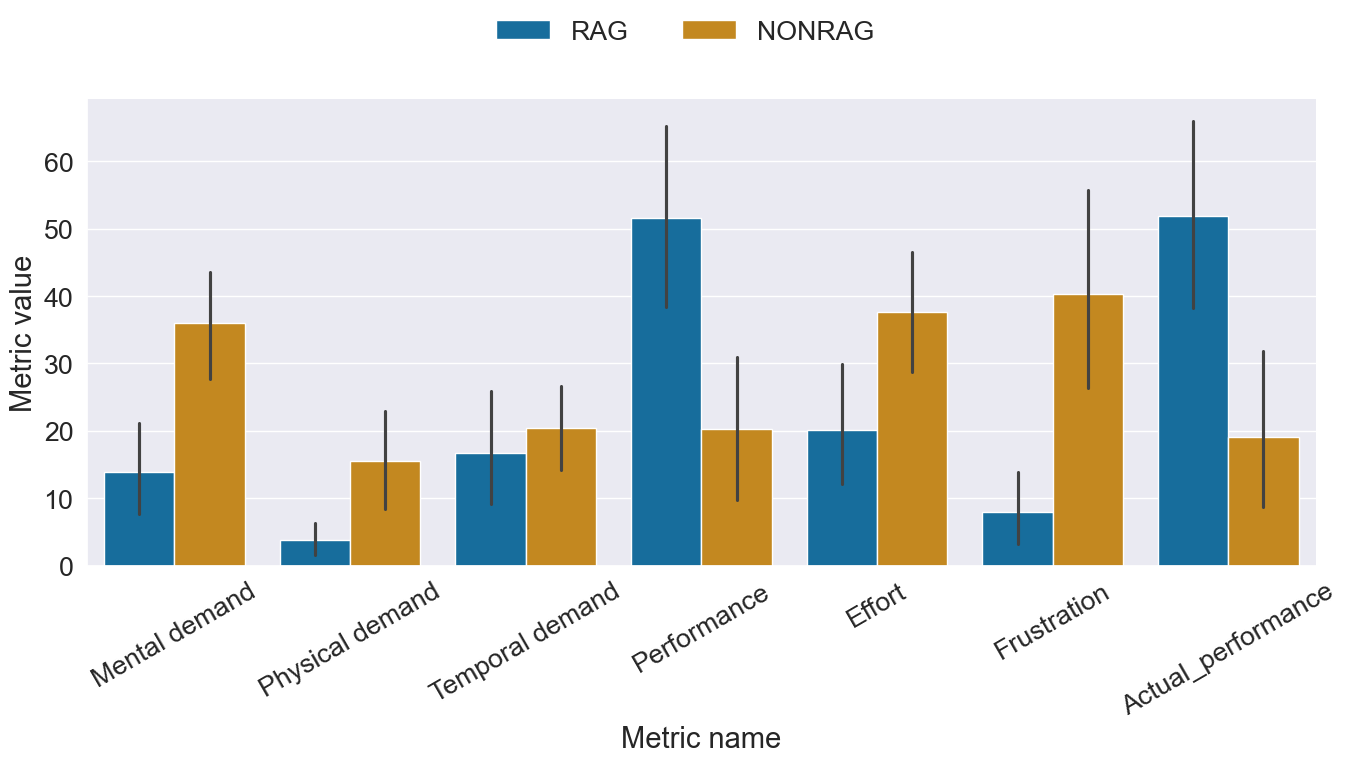

In [130]:
melted_df = pd.melt(df_for_catplot, id_vars = ["Survey type"], var_name = "Metric name", value_name = "Metric value")
x_labels = metrics = ['Mental demand', 'Physical demand', 'Temporal demand', 'Performance', 'Effort', 'Frustration', 'Actual_performance']

plt.figure(figsize=(12, 5))
# Create a grouped catplot
g = sns.catplot(data=melted_df, x="Metric name", y="Metric value", hue="Survey type", kind="bar", aspect=2, height=6,
            palette="colorblind")
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, 1), ncol=len(melted_df.columns), title=None, frameon=False,
)

plt.xticks(ticks=range(len(x_labels)), labels=x_labels)
plt.tight_layout()
plt.xticks(rotation=30)
plt.savefig(f'../data/evaluation/nasa_tlx/sliders_catplot.png', bbox_inches='tight', dpi=600)

In [131]:
sns.set_style("whitegrid")
# sns.set(rc={'figure.autolayout': True})
sns.set_context("notebook", font_scale=1)
sns.set_palette("colorblind")

Independent t-test Results:
Balanced mental demand: t-statistic = -4.0402, p-value = 0.0002
Balanced physical demand: t-statistic = -2.9334, p-value = 0.0054
Balanced temporal demand: t-statistic = -0.6265, p-value = 0.5344
Balanced performance: t-statistic = 3.4982, p-value = 0.0011
Balanced effort: t-statistic = -2.5849, p-value = 0.0133
Balanced frustration: t-statistic = -3.8513, p-value = 0.0004
Balanced actual performance: t-statistic = 3.4118, p-value = 0.0014


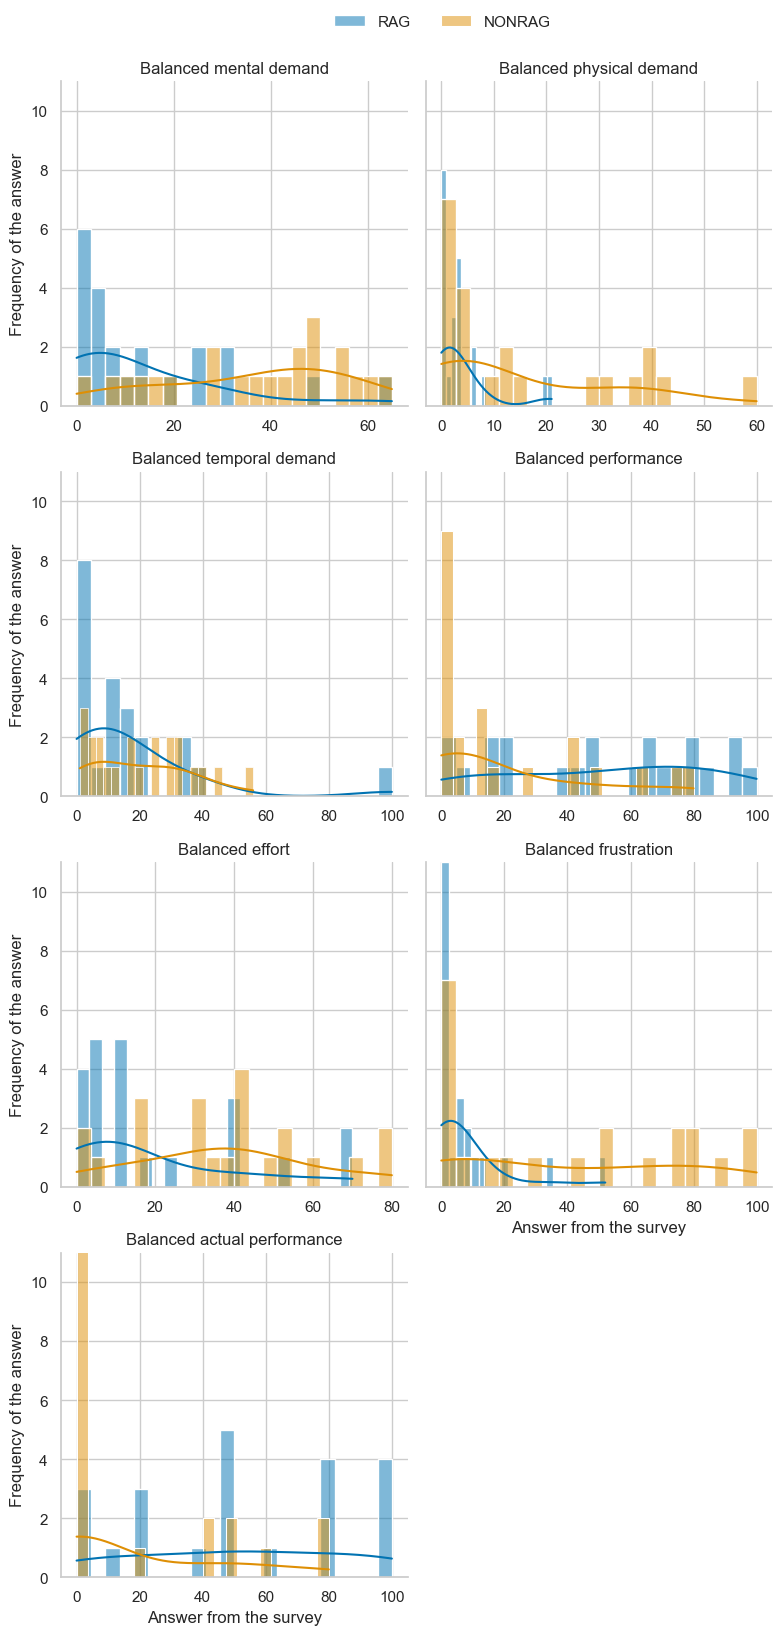

In [132]:
columns_of_interest = ['Balanced mental demand', 
                        'Balanced physical demand', 
                        'Balanced temporal demand', 
                        'Balanced performance', 
                        'Balanced effort', 
                        'Balanced frustration',
                        'Balanced actual performance',]

group1_data = cleaned_df.loc[cleaned_df['Survey type'] == 'RAG', columns_of_interest]
group2_data = cleaned_df.loc[cleaned_df['Survey type'] == 'NONRAG', columns_of_interest]

results = {}
for column in columns_of_interest:
    t_statistic, p_value = stats.ttest_ind(group1_data[column], group2_data[column])
    results[column] = {'t_statistic': t_statistic, 'p_value': p_value}

num_columns = len(columns_of_interest)
num_rows = (num_columns + 1) // 2

grid = sns.FacetGrid(pd.melt(cleaned_df, id_vars='Survey type', value_vars=columns_of_interest),
                     col="variable", hue="Survey type", col_wrap=2, height=4, sharex=False)
grid.map(sns.histplot, 'value', alpha=0.5, bins=22, kde=True)
grid.add_legend()
sns.move_legend(
    grid, "lower center",
    bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False,
)
grid.set_axis_labels('Answer from the survey', 'Frequency of the answer')
grid.set_titles(col_template="{col_name}", row_template="")
grid.set(ylim=(0, 11))
plt.savefig(f'../data/evaluation/nasa_tlx/t_test_results_balanced.png', bbox_inches='tight', dpi=600)

print("Independent t-test Results:")
for column, result in results.items():
    print(f"{column}: t-statistic = {result['t_statistic']:.4f}, p-value = {result['p_value']:.4f}")
    
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)
results_df.to_csv('../data/evaluation/nasa_tlx/t_test_results_balanced.csv', index_label='Variable')

Independent t-test Results:
Base mental demand: t-statistic = -5.7703, p-value = 0.0000
Base physical demand: t-statistic = -3.8751, p-value = 0.0004
Base temporal demand: t-statistic = -1.3170, p-value = 0.1950
Base performance: t-statistic = 4.7220, p-value = 0.0000
Base effort: t-statistic = -3.7053, p-value = 0.0006
Base frustration: t-statistic = -4.4202, p-value = 0.0001
Base actual performance: t-statistic = 3.5670, p-value = 0.0009


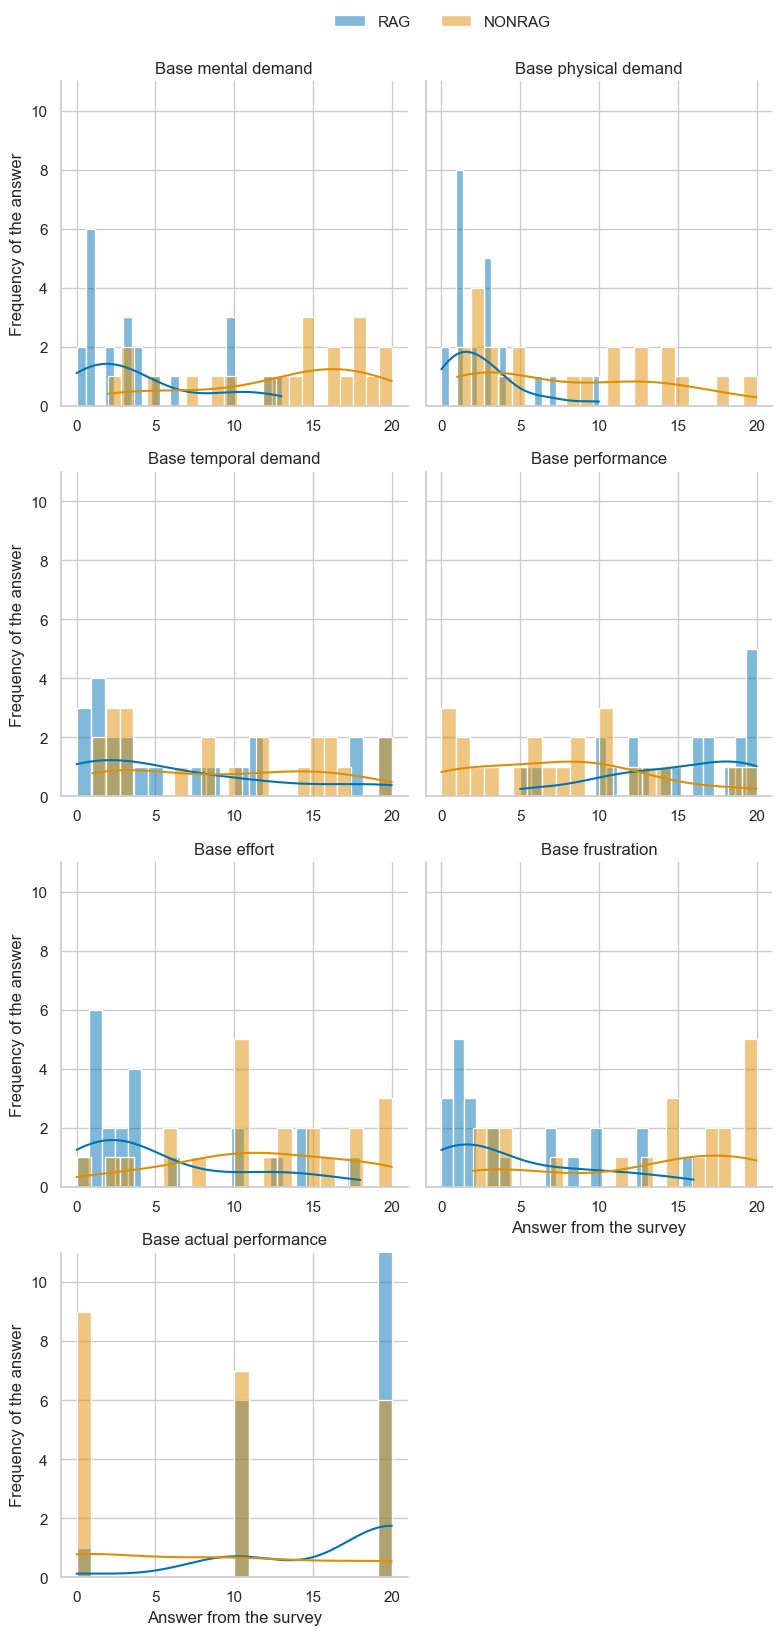

In [133]:
columns_of_interest = ['Base mental demand', 
                        'Base physical demand', 
                        'Base temporal demand', 
                        'Base performance', 
                        'Base effort', 
                        'Base frustration',
                        'Base actual performance',]

group1_data = cleaned_df.loc[cleaned_df['Survey type'] == 'RAG', columns_of_interest]
group2_data = cleaned_df.loc[cleaned_df['Survey type'] == 'NONRAG', columns_of_interest]

results = {}
for column in columns_of_interest:
    t_statistic, p_value = stats.ttest_ind(group1_data[column], group2_data[column])
    results[column] = {'t_statistic': t_statistic, 'p_value': p_value}

num_columns = len(columns_of_interest)
num_rows = (num_columns + 1) // 2

grid = sns.FacetGrid(pd.melt(cleaned_df, id_vars='Survey type', value_vars=columns_of_interest),
                     col="variable", hue="Survey type", col_wrap=2, height=4, sharex=False)
grid.map(sns.histplot, 'value', alpha=0.5, bins=22, kde=True)
grid.add_legend()
sns.move_legend(
    grid, "lower center",
    bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False,
)
grid.set_axis_labels('Answer from the survey', 'Frequency of the answer')
grid.set_titles(col_template="{col_name}", row_template="")
grid.set(ylim=(0, 11))
plt.savefig(f'../data/evaluation/nasa_tlx/t_test_results_base.png', bbox_inches='tight', dpi=600)

print("Independent t-test Results:")
for column, result in results.items():
    print(f"{column}: t-statistic = {result['t_statistic']:.4f}, p-value = {result['p_value']:.4f}")
    
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)
results_df.to_csv('../data/evaluation/nasa_tlx/t_test_results_base.csv', index_label='Variable')